<a href="https://colab.research.google.com/github/revantbhatia/DPBH/blob/main/Car_Prices_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dependencies**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso #
from sklearn import metrics #Used for importing tools for evaluating the model


Data Collection and Pre Proccessing


In [ ]:
#Loading the data from CSV file to Pandas
car_dataset =pd.read_csv('/content/car data.csv')

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.shape

(301, 9)

There are 301 examples in total

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# To find number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#Checking distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the data for ML

In [ ]:
car_dataset.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace =True)
car_dataset.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace =True)
car_dataset.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace =True)


In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the Data and target

In [ ]:
X = car_dataset.drop(['Car_Name' ,'Selling_Price'],axis=1)
Y =  car_dataset["Selling_Price"]

In [ ]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

Splitting Training and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

**1st Linear Regression Model**

Model Training

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

**Model** **evaluation**

In [ ]:
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
 #R sqaured Error
 error_score = metrics.r2_score(Y_train,training_data_prediction)

In [ ]:
print("r squared error : " , error_score)

r squared error :  0.8799451660493711


Visulaizing actual and predictive prices

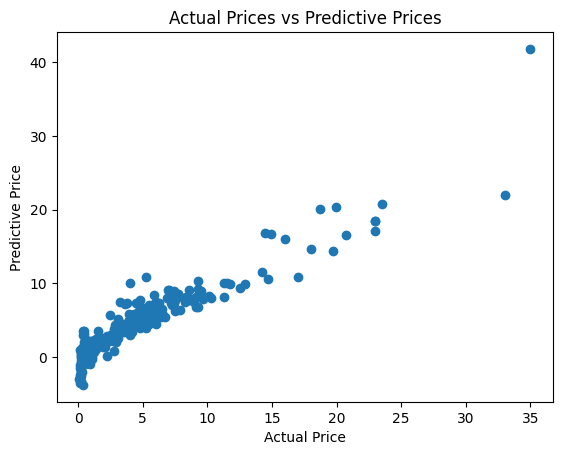

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predictive Price")
plt.title("Actual Prices vs Predictive Prices")
plt.show()

# **WHY DID WE USED TRAINING DATA SET TO PREDICT OUR MODEL FIRST**

When we use LinearRegression().predict(X_train) with the training data, it's typically for evaluating the performance of the model or understanding how well it has learned from the training data.

Here's why we do it:

Evaluation of Model Performance: We use the training data to make predictions because we already know the true target values for this data. By comparing the predicted values with the actual values, we can evaluate how well the model has learned from the training data. This helps us understand if the model is overfitting (memorizing the training data too well) or underfitting (not capturing the underlying patterns in the data).

Understanding Training Performance: It allows us to understand how well the model fits the training data. While this might seem redundant since the model has been trained on this data, it can still provide valuable insights. For example, if the predictions closely match the actual values, it indicates that the model has successfully captured the relationships within the training data.

Debugging and Fine-tuning: Predicting on the training data can help in debugging and fine-tuning the model. If the predictions deviate significantly from the actual values, it might indicate issues with the model's architecture, hyperparameters, or data preprocessing steps.

Visualizing Model Performance: Predictions on the training data can also be used to visualize the model's performance graphically. Scatter plots comparing actual vs. predicted values can provide a clear visual representation of how well the model is performing.

However, it's important to note that while evaluating on the training data is useful for understanding how well the model fits the training data, it doesn't necessarily reflect how well the model will generalize to unseen data. For assessing the model's performance on unseen data, it's crucial to use separate validation or test datasets.






**TESTING THE MODEL**

In [ ]:
training_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
 #R sqaured Error
 error_score = metrics.r2_score(Y_test,training_data_prediction)

In [ ]:
print("r squared error : " , error_score)

r squared error :  0.8365766715027051


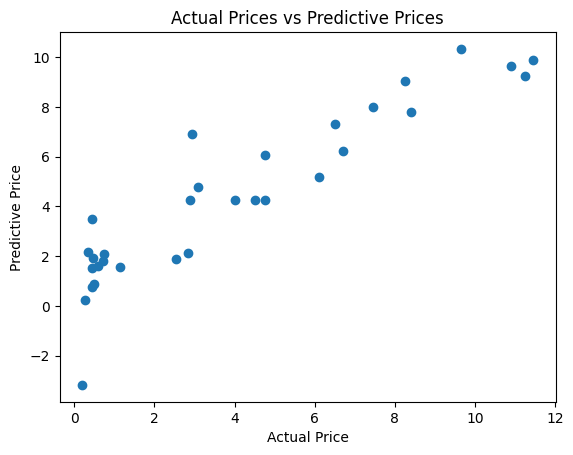

In [ ]:
plt.scatter(Y_test, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predictive Price")
plt.title("Actual Prices vs Predictive Prices")
plt.show()

**2nd  LASSO REGRESSION MODEL**



In [ ]:
lasso_reg_model = Lasso()

In [ ]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [ ]:
training_data_prediction1 = lasso_reg_model.predict(X_train)

In [ ]:
 #R sqaured Error
 error_score = metrics.r2_score(Y_train,training_data_prediction1)
 print("r squared error : " , error_score)

r squared error :  0.8427856123435794


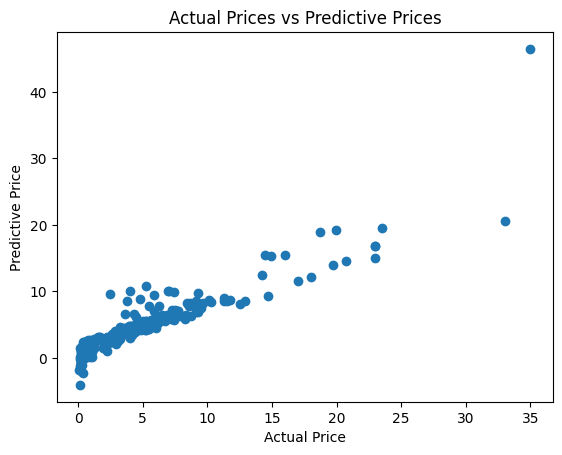

In [ ]:
plt.scatter(Y_train, training_data_prediction1)
plt.xlabel("Actual Price")
plt.ylabel("Predictive Price")
plt.title("Actual Prices vs Predictive Prices")
plt.show()

In [ ]:
training_data_prediction2 = lin_reg_model.predict(X_test)

In [ ]:
 #R sqaured Error
 error_score = metrics.r2_score(Y_test,training_data_prediction2)
 print("r squared error : " , error_score)

r squared error :  0.8365766715027051


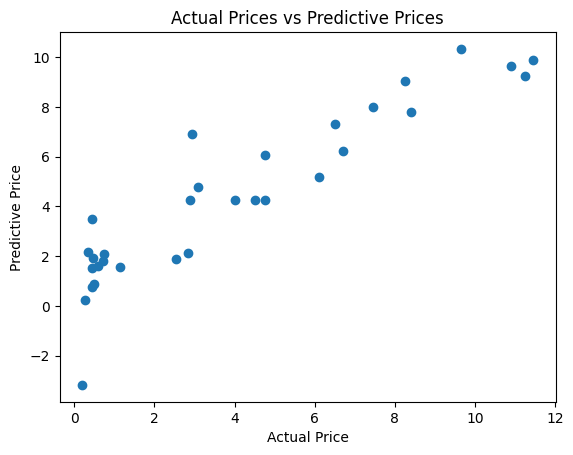

In [ ]:
plt.scatter(Y_test, training_data_prediction2)
plt.xlabel("Actual Price")
plt.ylabel("Predictive Price")
plt.title("Actual Prices vs Predictive Prices")
plt.show()